In [1]:
import pandas as pd
import numpy as np

In [2]:
DATA_PATH = 'raw.csv'

In [3]:
df = pd.read_csv(DATA_PATH)

In [4]:
df_original = df.copy()

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

In [6]:
display(df.head(10))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
print(df.shape)

(7043, 21)


In [8]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [9]:
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

Series([], dtype: int64)


In [10]:
non_null_pct = (1 - df.isnull().mean()).sort_values()
print("\n=== Non-null percentage (bottom 20) ===")
print((non_null_pct * 100).head(20).round(2))


=== Non-null percentage (bottom 20) ===
customerID          100.0
gender              100.0
SeniorCitizen       100.0
Partner             100.0
Dependents          100.0
tenure              100.0
PhoneService        100.0
MultipleLines       100.0
InternetService     100.0
OnlineSecurity      100.0
OnlineBackup        100.0
DeviceProtection    100.0
TechSupport         100.0
StreamingTV         100.0
StreamingMovies     100.0
Contract            100.0
PaperlessBilling    100.0
PaymentMethod       100.0
MonthlyCharges      100.0
TotalCharges        100.0
dtype: float64


In [11]:
print("=== Numeric summary (describe) ===")
display(df.select_dtypes(include=[np.number]).describe().T)

=== Numeric summary (describe) ===


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [12]:
obj_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_like = []
for c in obj_cols:
    # try converting to numeric (coerce errors)
    coerced = pd.to_numeric(df[c], errors='coerce')
    non_null_original = df[c].notnull().sum()
    non_null_coerced = coerced.notnull().sum()
    if non_null_coerced / max(1, non_null_original) > 0.9:
        numeric_like.append((c, non_null_coerced, non_null_original))
print("\nColumns with mostly numeric content but dtype object (name, coerced_non_null, original_non_null):")
print(numeric_like)


Columns with mostly numeric content but dtype object (name, coerced_non_null, original_non_null):
[('TotalCharges', np.int64(7032), np.int64(7043))]


In [13]:
target_col = 'Churn'   # assuming target is named 'Churn' per your dataset description

if target_col in df.columns:
    churn_counts = df[target_col].value_counts(dropna=False)
    churn_pct = df[target_col].value_counts(normalize=True, dropna=False) * 100
    print("=== Churn counts ===")
    print(churn_counts)
    print("\n=== Churn percent ===")
    print(churn_pct.round(2))
else:
    print(f"Target column '{target_col}' not found. Columns available: {df.columns.tolist()}")

=== Churn counts ===
Churn
No     5174
Yes    1869
Name: count, dtype: int64

=== Churn percent ===
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


In [14]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# exclude the target column from features list
if 'Churn' in cat_cols:
    cat_cols.remove('Churn')

print("=== Detected categorical columns ===")
print(cat_cols)

print("\n=== Unique counts for categorical columns (name: unique_count) ===")
for c in cat_cols:
    print(f"{c}: {df[c].nunique(dropna=False)}")

print("\n=== Top values for each categorical column (up to top 8) ===")
for c in cat_cols:
    print(f"\n--- {c} ---")
    print(df[c].value_counts(dropna=False).head(8))

=== Detected categorical columns ===
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']

=== Unique counts for categorical columns (name: unique_count) ===
customerID: 7043
gender: 2
Partner: 2
Dependents: 2
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
TotalCharges: 6531

=== Top values for each categorical column (up to top 8) ===

--- customerID ---
customerID
7590-VHVEG    1
5575-GNVDE    1
3668-QPYBK    1
7795-CFOCW    1
9237-HQITU    1
9305-CDSKC    1
1452-KIOVK    1
6713-OKOMC    1
Name: count, dtype: int64

--- gender ---
gender
Male      3555
Female    3488
Name: count, dtype: int64

--- Partner ---
Partner

In [15]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", num_cols)

outlier_counts = {}
for c in num_cols:
    series = df[c].dropna()
    if len(series) < 1:
        outlier_counts[c] = 0
        continue
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    cnt = ((series < lower) | (series > upper)).sum()
    outlier_counts[c] = int(cnt)

print("\n=== Outlier counts (IQR rule) ===")
for k, v in outlier_counts.items():
    print(f"{k}: {v}")

Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']

=== Outlier counts (IQR rule) ===
SeniorCitizen: 1142
tenure: 0
MonthlyCharges: 0


In [16]:
target_col = 'Churn'
numeric_cols = [c for c in df.select_dtypes(include=[np.number]).columns.tolist() if c != target_col]
categorical_cols = [c for c in df.columns.tolist() if c not in numeric_cols and c != target_col]

print("=== Suggested numeric columns ===")
print(numeric_cols)
print("\n=== Suggested categorical columns ===")
print(categorical_cols)

=== Suggested numeric columns ===
['SeniorCitizen', 'tenure', 'MonthlyCharges']

=== Suggested categorical columns ===
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


In [17]:
df_inspect = df.copy()

# try converting TotalCharges to numeric (coerce errors -> NaN)
df_inspect['TotalCharges_numeric'] = pd.to_numeric(df_inspect['TotalCharges'], errors='coerce')

# how many nulls after coercion
n_total = len(df_inspect)
n_coerced_null = df_inspect['TotalCharges_numeric'].isna().sum()
print(f"Rows total: {n_total}; TotalCharges -> numeric produced NaN in {n_coerced_null} rows")

# show those rows (selected cols) to inspect
cols_to_show = ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'TotalCharges_numeric', 'Churn']
print("\nRows where TotalCharges_numeric is NaN:")
display(df_inspect[df_inspect['TotalCharges_numeric'].isna()][cols_to_show].head(20))

# show unique tenure values among those problematic rows
print("\nUnique tenure values for those rows:")
print(sorted(df_inspect[df_inspect['TotalCharges_numeric'].isna()]['tenure'].unique()))

# show counts by tenure for problematic rows (helpful to decide)
print("\nCounts by tenure for problematic rows:")
print(df_inspect[df_inspect['TotalCharges_numeric'].isna()]['tenure'].value_counts().sort_index())

Rows total: 7043; TotalCharges -> numeric produced NaN in 11 rows

Rows where TotalCharges_numeric is NaN:


,customerID,tenure,MonthlyCharges,TotalCharges,TotalCharges_numeric,Churn
488,4472-LVYGI,0,52.55,,NaN,No
753,3115-CZMZD,0,20.25,,NaN,No
936,5709-LVOEQ,0,80.85,,NaN,No
1082,4367-NUYAO,0,25.75,,NaN,No
1340,1371-DWPAZ,0,56.05,,NaN,No
3331,7644-OMVMY,0,19.85,,NaN,No
3826,3213-VVOLG,0,25.35,,NaN,No
4380,2520-SGTTA,0,20.00,,NaN,No
5218,2923-ARZLG,0,19.70,,NaN,No
6670,4075-WKNIU,0,73.35,,NaN,No



Unique tenure values for those rows:
[np.int64(0)]

Counts by tenure for problematic rows:
tenure
0    11
Name: count, dtype: int64


In [18]:
special_map_candidates = [
    ('No internet service', [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies'
    ]),
    ('No phone service', ['MultipleLines'])
]

for token, cols in special_map_candidates:
    print(f"\n=== token: '{token}' ===")
    for c in cols:
        if c in df.columns:
            val = df[c].value_counts(dropna=False).get(token, 0)
            print(f"{c}: {val}")
        else:
            print(f"{c}: (column not present)")


=== token: 'No internet service' ===
OnlineSecurity: 1526
OnlineBackup: 1526
DeviceProtection: 1526
TechSupport: 1526
StreamingTV: 1526
StreamingMovies: 1526

=== token: 'No phone service' ===
MultipleLines: 682


In [19]:
df_clean = df.copy()

In [20]:
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

In [21]:
mask_new_customers = df_clean['TotalCharges'].isna() & (df_clean['tenure'] == 0)
n_mask = mask_new_customers.sum()
print(f"Rows identified as new-customer TotalCharges NaN (to set to 0): {n_mask}")
df_clean.loc[mask_new_customers, 'TotalCharges'] = 0.0

Rows identified as new-customer TotalCharges NaN (to set to 0): 11


In [22]:
internet_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]
for c in internet_cols:
    if c in df_clean.columns:
        df_clean[c] = df_clean[c].replace({'No internet service': 'No'})

In [23]:
if 'MultipleLines' in df_clean.columns:
    df_clean['MultipleLines'] = df_clean['MultipleLines'].replace({'No phone service': 'No'})


In [24]:
if 'customerID' in df_clean.columns:
    df_clean.drop(columns=['customerID'], inplace=True)
    print("Dropped 'customerID' from df_clean (kept original df untouched).")

Dropped 'customerID' from df_clean (kept original df untouched).


In [25]:
print("\n=== Final checks ===")
print("TotalCharges dtype:", df_clean['TotalCharges'].dtype)
print("TotalCharges NaNs after all fixes:", df_clean['TotalCharges'].isna().sum())

# Show value_counts of mapped columns to verify tokens removed
print("\nValue counts (sample) for internet-related cols after mapping:")
for c in internet_cols:
    if c in df_clean.columns:
        print(f"\n--- {c} ---")
        print(df_clean[c].value_counts(dropna=False).head(8))

if 'MultipleLines' in df_clean.columns:
    print("\n--- MultipleLines ---")
    print(df_clean['MultipleLines'].value_counts(dropna=False))

# show a quick df_clean.info() and head
print("\n=== df_clean.info() ===")
display(df_clean.info())
print("\n=== df_clean.head(8) ===")
display(df_clean.head(8))


=== Final checks ===
TotalCharges dtype: float64
TotalCharges NaNs after all fixes: 0

Value counts (sample) for internet-related cols after mapping:

--- OnlineSecurity ---
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64

--- OnlineBackup ---
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

--- DeviceProtection ---
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64

--- TechSupport ---
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64

--- StreamingTV ---
StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64

--- StreamingMovies ---
StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64

--- MultipleLines ---
MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

=== df_clean.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender 

None


=== df_clean.head(8) ===


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


In [ ]:
%pip install matplotlib

In [27]:
import matplotlib.pyplot as plt

In [28]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 10

print("df_clean shape:", df_clean.shape)

df_clean shape: (7043, 20)


Churn counts:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn percent (rounded):
 Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


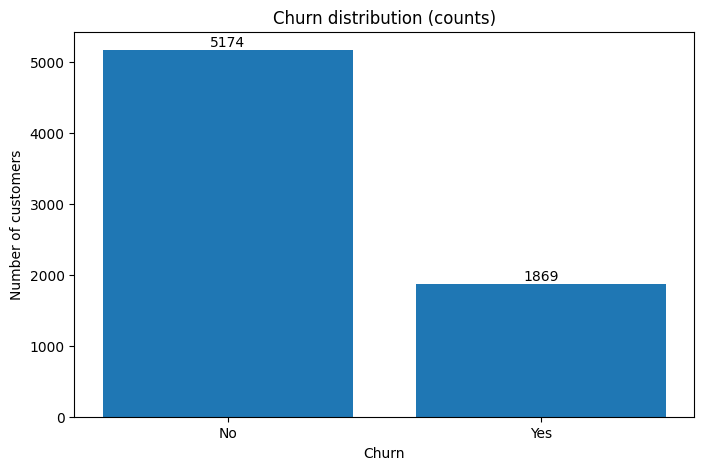

In [29]:
churn_counts = df_clean['Churn'].value_counts()
churn_pct = df_clean['Churn'].value_counts(normalize=True) * 100
print("Churn counts:\n", churn_counts)
print("\nChurn percent (rounded):\n", churn_pct.round(2))

# Bar plot
fig, ax = plt.subplots()
ax.bar(churn_counts.index.astype(str), churn_counts.values)
ax.set_title('Churn distribution (counts)')
ax.set_ylabel('Number of customers')
ax.set_xlabel('Churn')
for i, v in enumerate(churn_counts.values):
    ax.text(i, v + max(churn_counts.values)*0.01, str(v), ha='center')
plt.show()

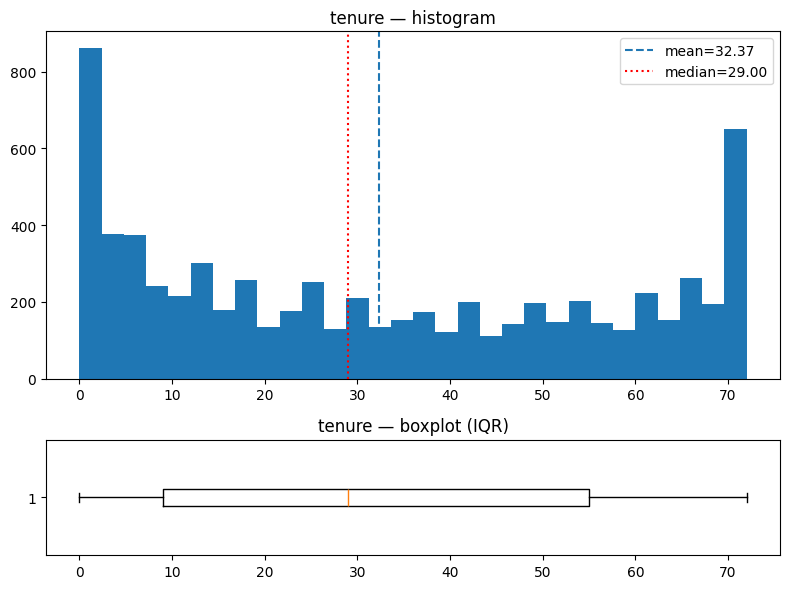

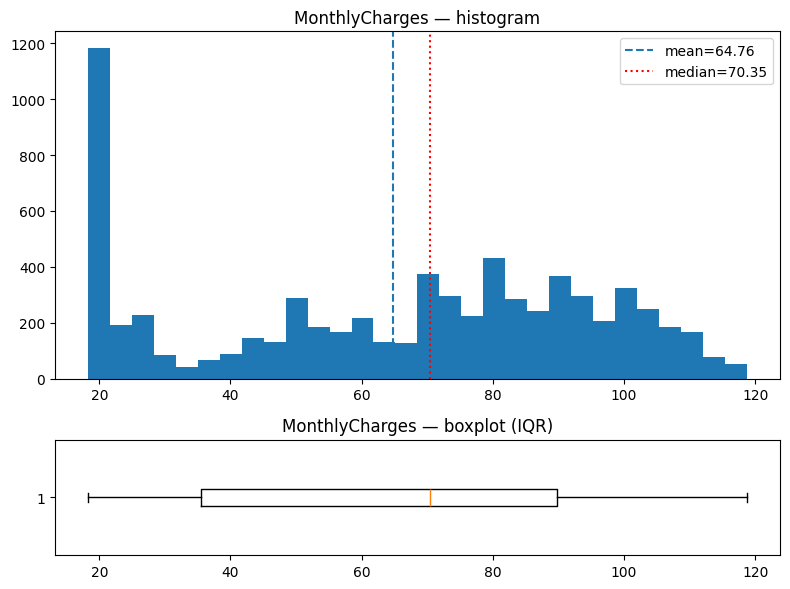

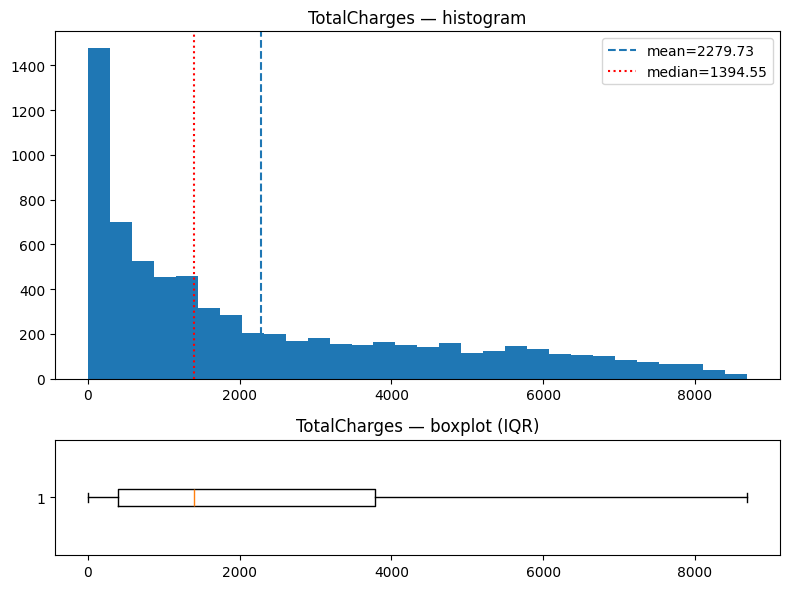


Numeric summary (describe) for the three columns:


,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [35]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    fig, (ax_hist, ax_box) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[3,1]}, figsize=(8,6))
    # histogram
    vals = df_clean[col].dropna()
    ax_hist.hist(vals, bins=30)
    ax_hist.axvline(vals.mean(), linestyle='--', label=f"mean={vals.mean():.2f}")
    ax_hist.axvline(vals.median(), color='red', linestyle=':', label=f"median={vals.median():.2f}")
    ax_hist.set_title(f'{col} — histogram')
    ax_hist.legend()
    # boxplot
    ax_box.boxplot(vals, vert=False)
    ax_box.set_title(f'{col} — boxplot (IQR)')
    plt.tight_layout()
    plt.show()

# Also print describe table for these
print("\nNumeric summary (describe) for the three columns:")
display(df_clean[num_cols].describe().T)

Correlation matrix (numeric features):


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


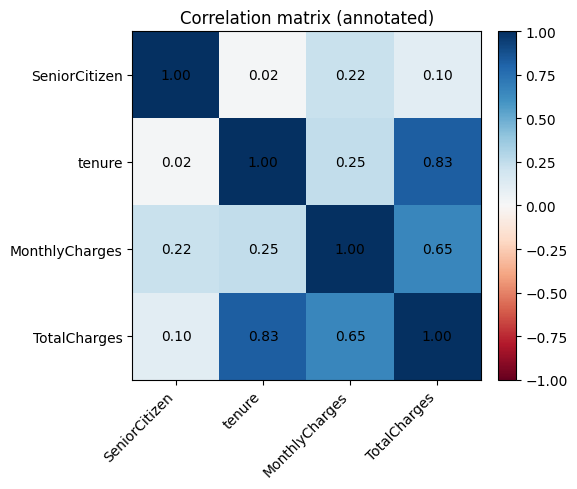

In [31]:
num_for_corr = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
corr = df_clean[num_for_corr].corr()
print("Correlation matrix (numeric features):")
display(corr)

# heatmap-like plot with annotations (matplotlib only)
fig, ax = plt.subplots(figsize=(6,5))
cax = ax.imshow(corr.values, vmin=-1, vmax=1, cmap='RdBu')
ax.set_xticks(np.arange(len(num_for_corr)))
ax.set_yticks(np.arange(len(num_for_corr)))
ax.set_xticklabels(num_for_corr, rotation=45, ha='right')
ax.set_yticklabels(num_for_corr)
# annotate correlation values
for i in range(len(num_for_corr)):
    for j in range(len(num_for_corr)):
        text = ax.text(j, i, f"{corr.values[i,j]:.2f}", ha="center", va="center", color="black")
fig.colorbar(cax, fraction=0.046, pad=0.04)
ax.set_title("Correlation matrix (annotated)")
plt.tight_layout()
plt.show()


=== Contract ===
Counts:
 Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
Churn rate (proportion churned) sorted:
 Contract
Month-to-month    0.427
One year          0.113
Two year          0.028
Name: Churn, dtype: float64


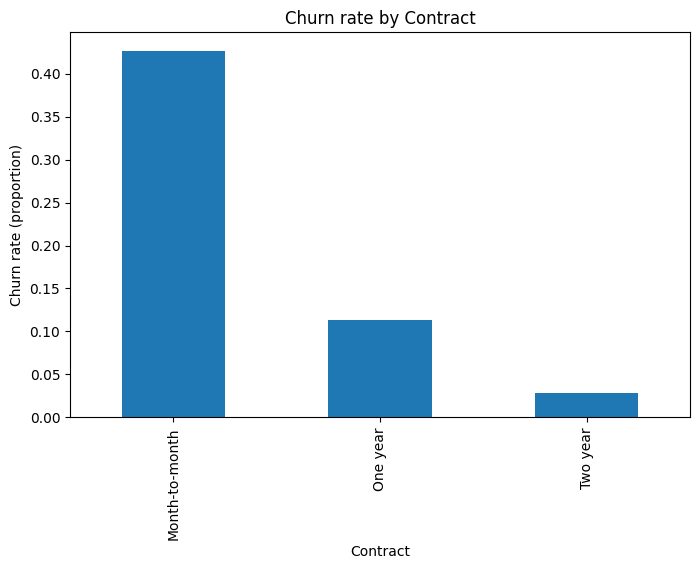


=== InternetService ===
Counts:
 InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
Churn rate (proportion churned) sorted:
 InternetService
Fiber optic    0.419
DSL            0.190
No             0.074
Name: Churn, dtype: float64


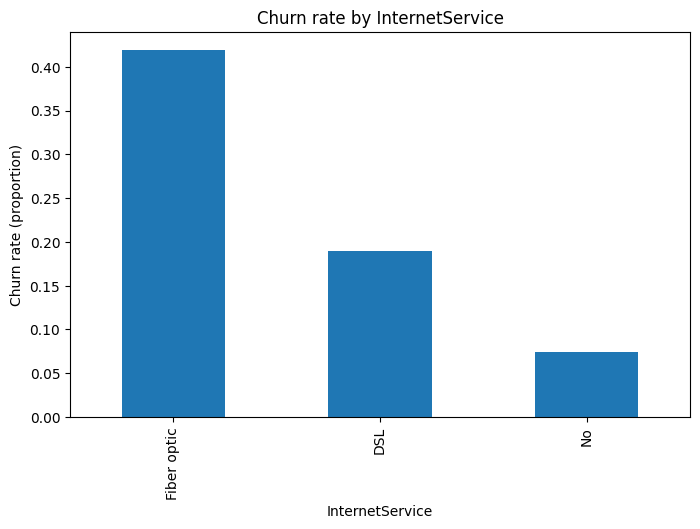


=== PaymentMethod ===
Counts:
 PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
Churn rate (proportion churned) sorted:
 PaymentMethod
Electronic check             0.453
Mailed check                 0.191
Bank transfer (automatic)    0.167
Credit card (automatic)      0.152
Name: Churn, dtype: float64


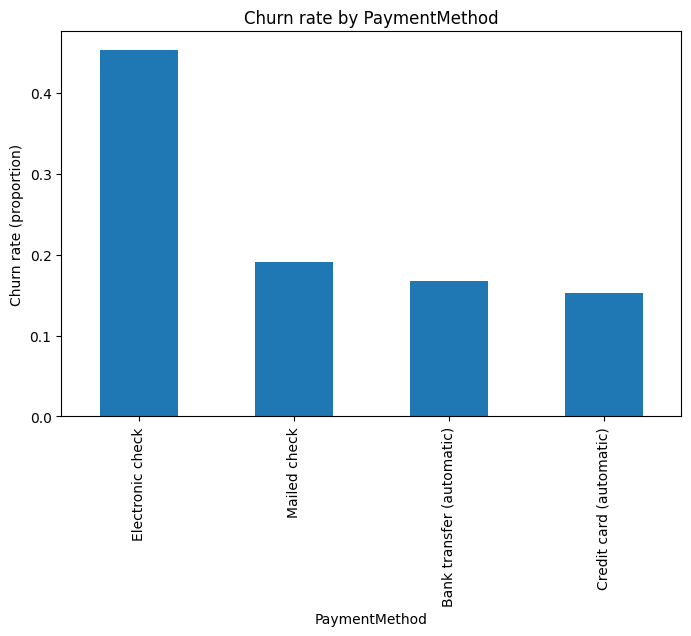


=== MultipleLines ===
Counts:
 MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64
Churn rate (proportion churned) sorted:
 MultipleLines
Yes    0.286
No     0.250
Name: Churn, dtype: float64


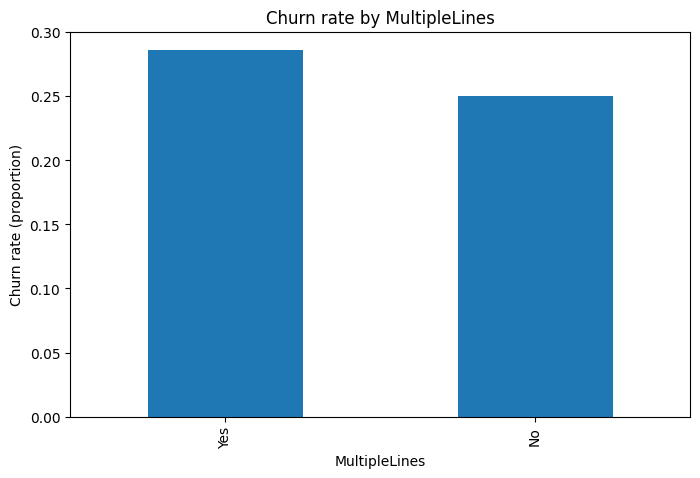


=== PaperlessBilling ===
Counts:
 PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64
Churn rate (proportion churned) sorted:
 PaperlessBilling
Yes    0.336
No     0.163
Name: Churn, dtype: float64


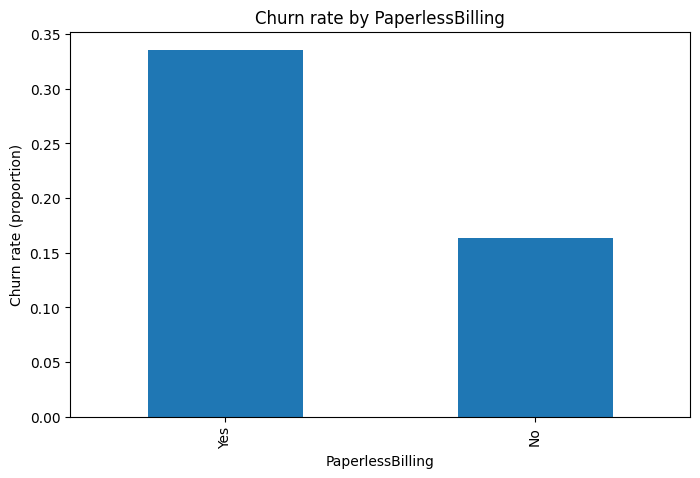


=== gender ===
Counts:
 gender
Male      3555
Female    3488
Name: count, dtype: int64
Churn rate (proportion churned) sorted:
 gender
Female    0.269
Male      0.262
Name: Churn, dtype: float64


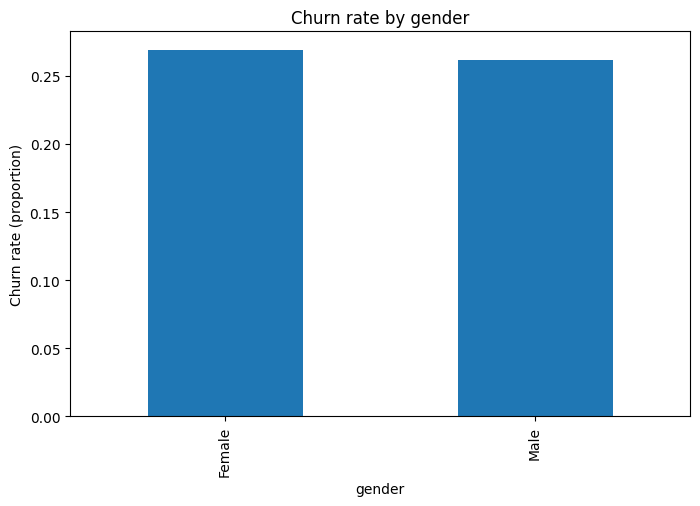

In [32]:
cat_cols = ['Contract', 'InternetService', 'PaymentMethod', 'MultipleLines', 'PaperlessBilling', 'gender']
for c in cat_cols:
    if c not in df_clean.columns:
        continue
    counts = df_clean[c].value_counts()
    churn_rate = df_clean.groupby(c)['Churn'].apply(lambda s: (s=='Yes').mean())
    print(f"\n=== {c} ===")
    print("Counts:\n", counts)
    print("Churn rate (proportion churned) sorted:\n", churn_rate.sort_values(ascending=False).round(3))
    # bar: churn rate
    fig, ax = plt.subplots()
    churn_rate.sort_values(ascending=False).plot(kind='bar', ax=ax)
    ax.set_ylabel('Churn rate (proportion)')
    ax.set_title(f'Churn rate by {c}')
    plt.show()

In [33]:
missing_counts = df_clean.isnull().sum()
print("Missing counts per column (should be zeros):")
print(missing_counts[missing_counts > 0])
if missing_counts.sum() == 0:
    print("No missing values found in df_clean.")

Missing counts per column (should be zeros):
Series([], dtype: int64)
No missing values found in df_clean.
